# 🎬 Introduction

Netflix has transformed the way people consume entertainment across the world. 
From movies to TV shows and documentaries, the platform’s library has grown massively over the years. 
This project analyzes the **Netflix Titles dataset**, which contains details about all movies and TV shows available on Netflix, such as their type, release year, genre, country, and date added to the platform.

## 🎯 Objective
The goal of this analysis is to uncover key insights about Netflix’s content library, including:
- Growth trends in the number of movies and TV shows over time  
- Popular genres and categories  
- Country-wise distribution of content  
- Key differences between movies and TV shows  

By the end of this analysis, we’ll understand how Netflix’s catalog has evolved and what types of content dominate the platform.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette('coolwarm')

# Load dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Basic inspection
print(df.shape)
print(df.info())
df.head()


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 🧹 Data Cleaning

Before analyzing the data, several cleaning and preprocessing steps were performed to ensure consistency and accuracy.

### 1. Handling Missing Values
Some columns like **director**, **cast**, and **country** contained missing values.  
These were filled with `"Unknown"` to avoid issues during grouping or analysis.

### 2. Converting Dates
The `date_added` column was cleaned by removing extra spaces and converted into proper datetime format.  
Any invalid or missing dates were safely handled using `errors='coerce'`.

### 3. Removing Duplicates
Duplicate records were removed based on the unique `show_id` to ensure each title appears only once.

### 4. Creating New Features
New columns were added to help with analysis:
- **year_added** and **month_added** → extracted from the `date_added` column.  
- **is_movie** and **is_tv_show** → binary indicators to separate content types.  

### 5. Splitting Genres
The `listed_in` column (which contains multiple genres separated by commas) was split into lists for better analysis.

These steps prepared the dataset for the next phase — **Exploratory Data Analysis (EDA)**.


In [7]:
# Handling missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Cleaning and converting dates
df['date_added'] = df['date_added'].astype(str).str.strip()  # remove spaces
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Removing duplicates
df.drop_duplicates(subset='show_id', inplace=True)

# Extracting useful features
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['is_movie'] = np.where(df['type'] == 'Movie', 1, 0)
df['is_tv_show'] = np.where(df['type'] == 'TV Show', 1, 0)

# Splitting genres for analysis
df['genres'] = df['listed_in'].str.split(', ')

# 📊 Exploratory Data Analysis (EDA)

In this section, we explore the Netflix dataset to identify key trends and patterns.  
We’ll analyze:
- Growth of Netflix content over time  
- Comparison between Movies and TV Shows  
- Top genres and countries contributing to the platform  
- Distribution of content ratings and release years


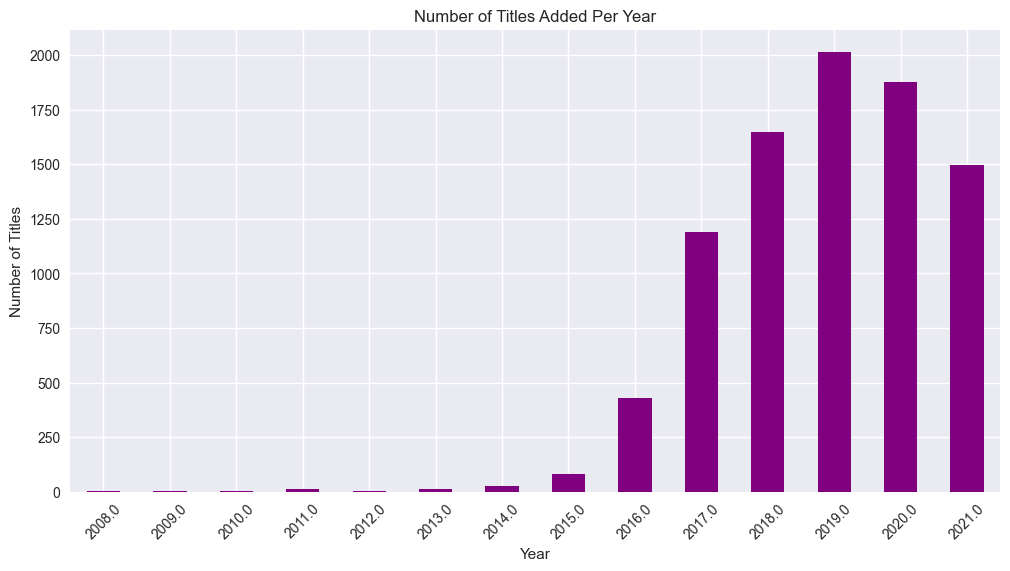

In [22]:
# Distribution of Titles Over Time
plt.figure(figsize=(12,6))
df.groupby('year_added').size().plot(kind='bar', color='purple')
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.savefig('../visuals/netflix_growth.png')
plt.show()


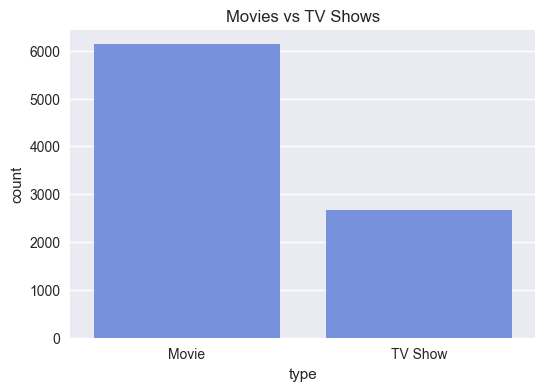

In [21]:
# Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows')
plt.savefig('../visuals/netflix_growth.png')
plt.show()


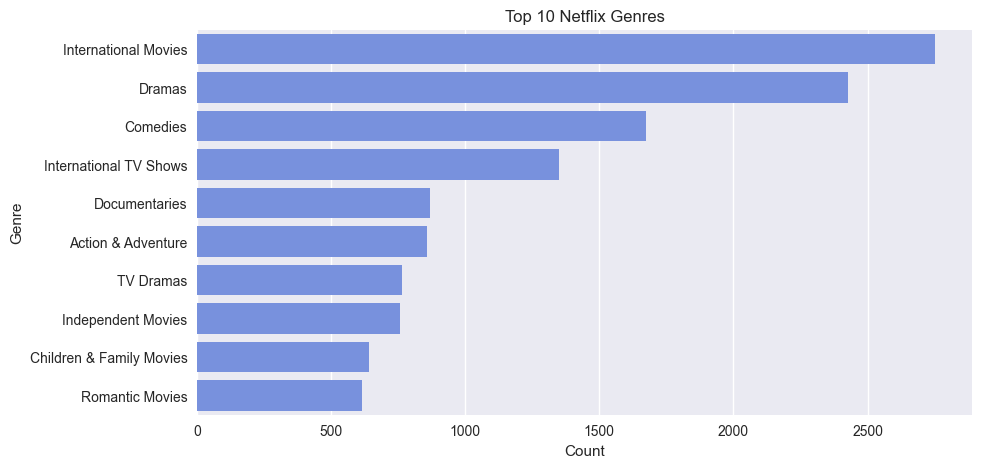

In [20]:
# Most Frequent Genres
from collections import Counter
genre_list = [genre for sublist in df['genres'].dropna() for genre in sublist]
genre_counts = Counter(genre_list)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre','Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=top_genres)
plt.title('Top 10 Netflix Genres')
plt.savefig('../visuals/netflix_growth.png')
plt.show()


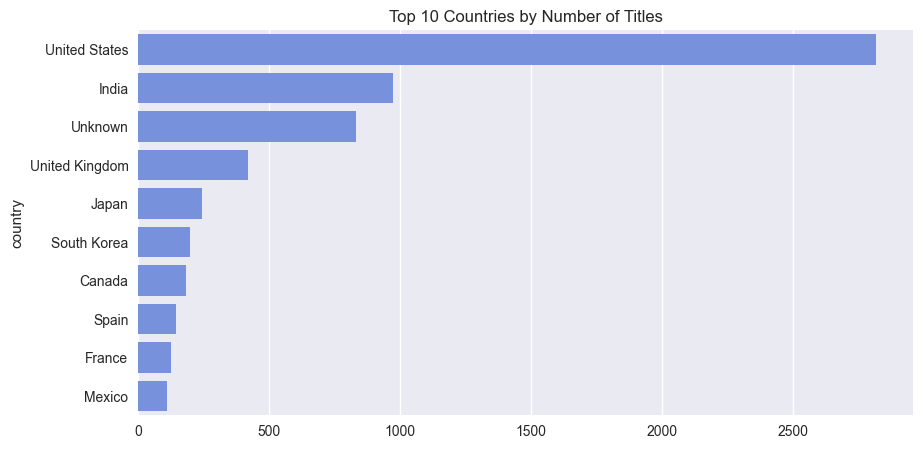

In [19]:
# Top Countries Producing Content
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Number of Titles')
plt.savefig('../visuals/netflix_growth.png')
plt.show()


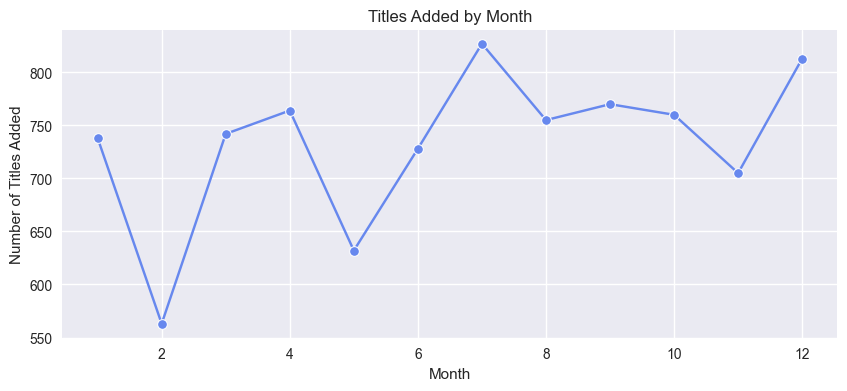

In [18]:
# Content Added Per Month (Seasonal Trends)
month_counts = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(10,4))
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o')
plt.title('Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.savefig('../visuals/netflix_growth.png')
plt.show()


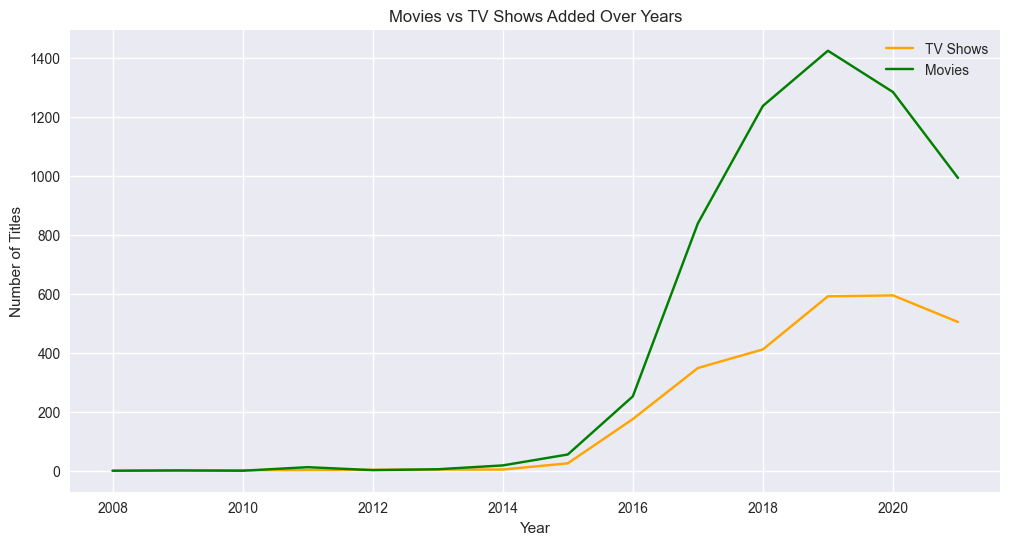

In [17]:
#	Growth of TV Shows vs Movies over time:
tv_by_year = df[df['type']=='TV Show'].groupby('year_added').size()
movies_by_year = df[df['type']=='Movie'].groupby('year_added').size()

plt.figure(figsize=(12,6))
plt.plot(tv_by_year.index, tv_by_year.values, label='TV Shows', color='orange')
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies', color='green')
plt.title('Movies vs TV Shows Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.savefig('../visuals/netflix_growth.png')
plt.show()


## 🧠 EDA Commentary

- Netflix’s library has grown rapidly since 2015, showing a huge spike in content additions.  
- TV Shows have grown faster than Movies in the last decade.  
- The United States dominates production, followed by India and the United Kingdom.  
- Drama, Comedy, and International genres appear most frequently, showing Netflix’s global appeal.  


# 💡 Insights

Based on the exploratory analysis, several interesting trends emerge:

### 🔺 Growth and Trends
- Netflix’s content library has expanded rapidly, especially after **2015**.  
- The platform saw consistent growth in both Movies and TV Shows, but **TV Shows grew at a faster rate** in recent years.

### 🎬 Content Type
- **Movies** still make up the majority of the catalog, but **TV Shows** now represent a significant share.  
- The increase in TV content reflects Netflix’s investment in multi-episode storytelling.

### 🌍 Countries
- The **United States** dominates Netflix production, followed by **India**, **the United Kingdom**, and other international contributors.  
- A growing number of titles come from **non-English-speaking countries**, showing Netflix’s global expansion.

### 🎭 Genres
- **Drama**, **Comedy**, and **International content** are the most popular categories.  
- A surge in **Documentaries** and **Stand-Up Comedy** shows a trend toward diverse storytelling formats.

### 📅 Temporal Insights
- Most content was added between **2016–2020**, aligning with Netflix’s global growth phase.  
- Older content (before 2010) makes up a smaller portion of the library.

These insights highlight Netflix’s strategy of diversifying genres, increasing TV content, and expanding its global presence.


In [14]:
#	Average Titles Added per Year (NumPy):
avg_titles = np.mean(df.groupby('year_added').size())
std_titles = np.std(df.groupby('year_added').size())
print(f"Average Titles Added Per Year: {avg_titles:.2f}")
print(f"Std Dev of Titles Added Per Year: {std_titles:.2f}")


Average Titles Added Per Year: 628.36
Std Dev of Titles Added Per Year: 785.29


In [15]:
#	Genre diversity analysis using NumPy:
df['num_genres'] = df['genres'].apply(lambda x: len(x) if isinstance(x,list) else 0)
print("Average Number of Genres per Title:", np.mean(df['num_genres']))


Average Number of Genres per Title: 2.194050187350971


# 🏁 Conclusion

This analysis of Netflix’s content library revealed several key trends:

- **Rapid growth** of content since 2015, with a significant surge in TV Shows.  
- **Movies** still dominate the catalog, but TV Shows are growing faster, reflecting Netflix’s investment in series.  
- **The US** remains the top content producer, with increasing contributions from India and other countries.  
- **Drama, Comedy, and International content** are the most common genres, highlighting diverse storytelling.  
- Netflix continues to expand its global footprint and genre variety, catering to both domestic and international audiences.

These insights can guide content strategy, marketing, and audience targeting, and provide a clear view of how Netflix’s library has evolved over time.


In [16]:
plt.savefig('../visuals/filename.png')

<Figure size 800x550 with 0 Axes>